# 5 . Algoritmo de Gram Schmidt

Use el método de Gram-Schmidt para ortogonalizar el conjunto formado por {$x^{n}$}${}_{n=0,1,2,3,4}$ en
el intervalo $−1 ≤ x ≤ 1$. Use Mathematica (Python) para comparar el conjunto obtenido con el formado
por los polinomios de Legendre con $n = 0, 1, 2, 3, 4$. Adem ́as, normalice las funciones y desarrolle
$f(x) = cos(x) sin(x)$ en ese intervalo con las funciones obtenidas.

EL punto 5 de la tarea 1 se estructurará de la siguiente manera: al inicio se mostrarán las librerias a usar y las funciones que se defniniran para simplificar enormemente el desarrollo del ejercicio, por ejemplo funciones como realizar un producto punto usando la base de funciones de Taylor, una funcion que me genere la base de funciones pidiendo como entrada la dimension de la base, etc. 

In [2]:
# Importamos librerias
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as ptl
import pandas as pd
from tabulate import tabulate

## Desarrollo de las funciones
### FUNCION GENERACIÓN DE LA BASE [base(var,n)]

Esta función toma como entrada la variable (var) independiente (dominio) la cual es un vector que contiene todos los valores muestreados del dominio, y el resultado es una base de Taylor {$x^{n}$} con dimension $n$, mas especificamente, un array que contiene la nube de puntos que representan al dominio evaluado en la función.

In [3]:
def base(var,n):
    fun = np.array([var**i for i in range(n)])
    return fun

### FUNCION PRODUCTO PUNTO [dot(dom,fun1,fun2)]

Esta función halla el producto punto de dos funciones (Representacion de la funcion en nube de puntos), en la cual recibe el dominio de las funciones, y las dos funciones a las que se le va a sacar el producto punto. Solo se integra usando el metodo de integración numerica de Simpson la cual recibe la funcion a integrar y el dominio de la misma, y retorna el resultado de la integración.

In [4]:
def dot(dom,fun1,fun2):

    inte = integrate.simpson(fun1*fun2,dom)
    return inte

### FUNCION DE NORMALIZACIÓN DE UNA BASE [norm(dom,fun_ort)]

Esta funcion normaliza los vectores de una base, es decir, hace que la norma de cada vector (función) sea unitario; recibe el dominio sobre el que esta definida la base, y tambien recibe la base de funciones como un bector el almacena la nube de puntos de cada funcion a normalizar, osea un vector de vectores. Para cada vector (función) se halla el producto de la funcion con si misma y al resultado se le saca la raiz cuadrada, luego los valores se van almacenando en un arreglo, luego se crea un nuevo arreglo en donde se almacenan las nubes de puntos de la base inicial dividiendo cada una por la norma que se encontro anteriormente, logrando asi normalizar a las nubes de puntos y entregando al final una base normalizada.



In [5]:
def norm(dom,fun_ort):

    #contamos cual es la dimension de la base
    len_base = len(fun_ort)
    norm_sqr = []
    for i in range(len_base):

        norm_sqr.append(math.sqrt(dot(dom,fun_ort[i],fun_ort[i])))

    fun_ort_norm = np.array([fun_ort[i]/norm_sqr[i] for i in range(len_base)])
    return fun_ort_norm

### FUNCION ALGORITMO DE GRAM-SCHMIDT [Gram(dom, fun)]

Esta funcion recibe el dominio de la base y una base no ortogonal, osea un vector que almacena nubes de puntos que representan las funciones no ortogonales, al final se entrega una base ortonormal, por lo que al final se aplica un proceso de normalización posterior a la ortogonalización. 

In [6]:
def Gram(dom, fun):
    # Queremos retornar ya la base pero ortogonalizada, por lo que el retorno sera otro vector de funciones

    # primero leemos cuantas funciones de la base son:
    len_base = len(fun)
    #aplicamos el algoritmo definiendo cada funcion por separado y luego uniendolas al final:
    arr_func = [fun[0]] # almacenamos la primera función de la nueva base ortogonal
    acum = np.zeros(len(dom))
    for k in range (1,len_base):
        for j in range(k):

            cross_point= dot(dom,arr_func[j],fun[k]) # producto punto cruzado
            norm_sqr = dot(dom,arr_func[j],arr_func[j]) # norma al cuadrado


            acum = acum + np.array((cross_point/norm_sqr)*arr_func[j])


        arr_func.append(fun[k] - acum)
        acum = np.zeros(len(dom))

    fun_ort = np.array(arr_func)
    base_ortN = norm(dom,fun_ort) ## Normalizamos la base resultante ya ortogonal

    return base_ortN

Ya con estas funciones es suficiente para poder resolver las preguntas del problema.

Definimos primero parametros basicos como el dominio, la dimension de la base, para el problema como son 5 funciones, entonces usamos dimension 5, y tambien la resolucion del dominio, mientras mas puntos, mejor el resultado de la ortogonalización.

In [7]:
num_base_functions = 5
res = 10000
xdom = np.linspace(-1,1,res)

Creamos la base de funciones polinomicas de Taylor centradas en cero.

In [8]:
base_taylor = base(xdom , num_base_functions)

Ploteamos las funciones:

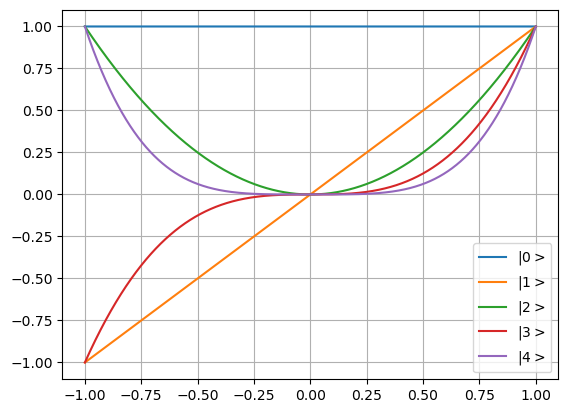

In [9]:
fig1, ax1 = ptl.subplots()

len_base = len(base_taylor)
for i in range(len_base):
    ax1.plot(xdom, base_taylor[i], label = f"$|{i}>$")
ax1.grid()
ax1.legend()

Hallamos la ortogonormalización de la base:

In [10]:
base_ort = Gram(xdom,base_taylor)

Ploteamos la nueva base:

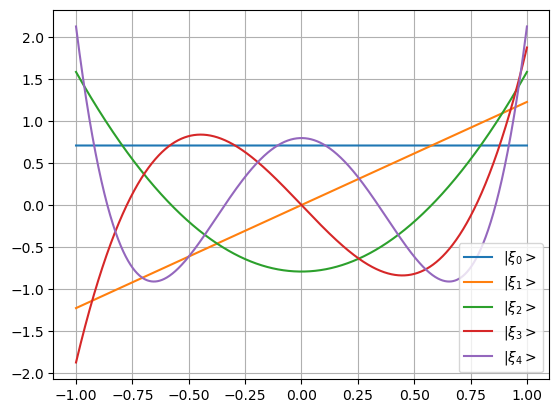

In [11]:
fig2, ax2 = ptl.subplots()

len_base = len(base_ort)
for i in range(len_base):
    ax2.plot(xdom, base_ort[i], label = f"$|\\xi_{i}>$")
ax2.grid()
ax2.legend()

Por ultimo colocamos en una tabla todos los productos cruzados y normas a modo de comparacion para mostrar que
en efecto obtuvimos una base ortonormal.


In [12]:
# sacamos los productos puntos cruzados en una matriz.
cross_dots = np.zeros((num_base_functions,num_base_functions))

for i in range(num_base_functions):
    for j in range(num_base_functions):
        cross_dots[i][j] = round(dot(xdom,base_taylor[i],base_taylor[j]),2)

### TABLA DE PRODUCTOS CRUZADOS CON LA BASE DE TAYLOR

In [13]:
data_taylor = pd.DataFrame(cross_dots,columns=["1", "x", "x^2", "x^3", "x^4"],index=["1", "x", "x^2", "x^3", "x^4"])

data_taylor_norms = pd.DataFrame(cross_dots.diagonal(),index=["1", "x", "x^2", "x^3", "x^4"])


print(tabulate(data_taylor, headers="keys", tablefmt="fancy_grid"))
print(tabulate(data_taylor_norms, tablefmt="fancy_grid"))

╒═════╤══════╤══════╤═══════╤═══════╤═══════╕
│     │    1 │    x │   x^2 │   x^3 │   x^4 │
╞═════╪══════╪══════╪═══════╪═══════╪═══════╡
│ 1   │ 2    │ 0    │  0.67 │  0    │  0.4  │
├─────┼──────┼──────┼───────┼───────┼───────┤
│ x   │ 0    │ 0.67 │  0    │  0.4  │  0    │
├─────┼──────┼──────┼───────┼───────┼───────┤
│ x^2 │ 0.67 │ 0    │  0.4  │  0    │  0.29 │
├─────┼──────┼──────┼───────┼───────┼───────┤
│ x^3 │ 0    │ 0.4  │  0    │  0.29 │  0    │
├─────┼──────┼──────┼───────┼───────┼───────┤
│ x^4 │ 0.4  │ 0    │  0.29 │  0    │  0.22 │
╘═════╧══════╧══════╧═══════╧═══════╧═══════╛
╒═════╤══════╕
│ 1   │ 2    │
├─────┼──────┤
│ x   │ 0.67 │
├─────┼──────┤
│ x^2 │ 0.4  │
├─────┼──────┤
│ x^3 │ 0.29 │
├─────┼──────┤
│ x^4 │ 0.22 │
╘═════╧══════╛


Hacemos lo mismo pero con la base ortogonal

In [14]:
cross_dots_norm = np.zeros((num_base_functions,num_base_functions))

for i in range(num_base_functions):
    for j in range(num_base_functions):
        cross_dots_norm[i][j] = abs(round(dot(xdom,base_ort[i],base_ort[j]),2))

## TABLA DE PRODUCTOS CRUZADOS CON LA BASE DE ortogonormal hallada

In [15]:
data_ortonorm = pd.DataFrame(cross_dots_norm,columns=["ξ0", "ξ1", "ξ2", "ξ3", "ξ4"],index=["ξ0", "ξ1", "ξ2", "ξ3", "ξ4"])

data_ortonorm_norms = pd.DataFrame(cross_dots_norm.diagonal(),index=["ξ0", "ξ1", "ξ2", "ξ3", "ξ4"])


print(tabulate(data_ortonorm, headers="keys", tablefmt="fancy_grid"))
print(tabulate(data_ortonorm_norms, tablefmt="fancy_grid"))

╒════╤══════╤══════╤══════╤══════╤══════╕
│    │   ξ0 │   ξ1 │   ξ2 │   ξ3 │   ξ4 │
╞════╪══════╪══════╪══════╪══════╪══════╡
│ ξ0 │    1 │    0 │    0 │    0 │    0 │
├────┼──────┼──────┼──────┼──────┼──────┤
│ ξ1 │    0 │    1 │    0 │    0 │    0 │
├────┼──────┼──────┼──────┼──────┼──────┤
│ ξ2 │    0 │    0 │    1 │    0 │    0 │
├────┼──────┼──────┼──────┼──────┼──────┤
│ ξ3 │    0 │    0 │    0 │    1 │    0 │
├────┼──────┼──────┼──────┼──────┼──────┤
│ ξ4 │    0 │    0 │    0 │    0 │    1 │
╘════╧══════╧══════╧══════╧══════╧══════╛
╒════╤═══╕
│ ξ0 │ 1 │
├────┼───┤
│ ξ1 │ 1 │
├────┼───┤
│ ξ2 │ 1 │
├────┼───┤
│ ξ3 │ 1 │
├────┼───┤
│ ξ4 │ 1 │
╘════╧═══╛


Ahora para desarrollar la función $f(x) = cos(x) sin(x)$ tenemos que hallar los coeficientes en nuestra base ortogonal proyectando cada uno de ellos sobre la función $f(x)$, por lo que aplicamos el producto punto de cada una de las funciones sobre $f(x)$ y almacenamos los coeficientes en un vector para luego usarlos para desarrollar la base.

In [16]:
fun_cossin = np.cos(xdom)*np.sin(xdom)

fun_cossin_base =  np.zeros(res)

for i in range(num_base_functions):

    fun_cossin_base = fun_cossin_base + dot(xdom,fun_cossin,base_ort[i]) * base_ort[i]


Ploteamos los dos resultados para comparar

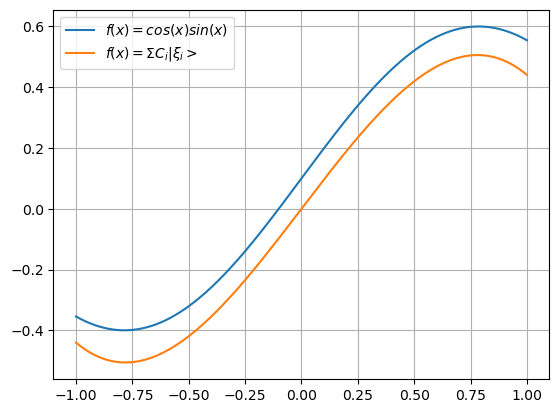

In [18]:
ptl.plot(xdom, fun_cossin + 0.1, label = f"$f(x)=cos(x)sin(x)$")
ptl.plot(xdom, fun_cossin_base, label = f"$f(x)=\Sigma C_i|\\xi_i>$")
ptl.grid()
ptl.legend()